
# Tau

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
# np.random.seed()
import matplotlib.pyplot as plt
from mon_jasnow import get_tau

In [24]:
Ny = 50
N_sweeps =10000
Tc = 2 / np.log(1 + np.sqrt(2))
N_steps = 50
T = np.linspace(0.01*Tc, 1.4*Tc, N_steps)
Nruns = 1
skips =3

In [4]:
%time _ = get_tau(30, 1, np.array([0.1]), 1, 1)

Wall time: 5.52 s


In [25]:
%time tau = get_tau(Ny, N_sweeps, T, N_runs=Nruns, skips=skips, )

Wall time: 4min 55s


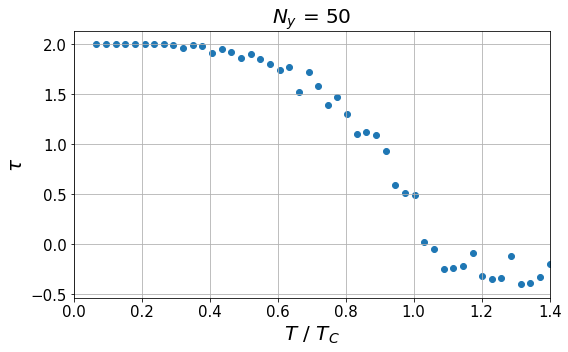

In [31]:
plt.figure(figsize=(8,5), tight_layout=True)
plt.scatter(T/(Tc), tau)
plt.xlim(0,1.4)
# plt.ylim(0,2.2)
plt.xlabel(fr"$T\ /\ T_C$", size=20)
plt.title(f"$N_y$ = {Ny}", size=20)
plt.ylabel(fr"$\tau$", size = 20)
plt.grid()
plt.xticks(size=15)
plt.yticks(size=15)
# 
plt.savefig(f"../img/FIXEDNy{Ny}_Sweeps{N_sweeps}_Nruns{Nruns}_Skips{skips}_Nsteps{N_steps}.png")

In [7]:
%time test_tau = get_tau(Ny, N_sweeps, np.array([T[3]]), N_runs=1, skips=300)
test_tau

Wall time: 219 ms


array([2.])

# Debug


In [3]:
from lattice_utils import get_lattice_pp, energy_diff
from mon_jasnow import metropolis_subroutine

In [9]:

def metropolis_mj_2_debug(N_size, N_sweeps, T, skips=50, N_runs=10):
    """
    Metropolis algorithm for computing expectation values of energy difference.
    """

    ev = []  # List for storing expectation value
    for run in range(N_runs):
        lattice_pp = get_lattice_pp(N_size, aligned=True)  # Create ++ -lattice
        prev = 0  # keeps track of last sampled state
        for i in range(N_sweeps):  # Do N_sweep sweeps
            metropolis_subroutine(lattice_pp, T, J=1.0)  # Tries to flip N^2 spins
            if (i > skips) and (
                i >= (prev + skips)
            ):  # Initial sweeps, and skip sweep between each sample
                prev = i
                E_diff = energy_diff(lattice_pp)

                k = np.exp(-E_diff / T)
                # if E_diff < 0 and T < (2 / np.log(1 + np.sqrt(2))):
                # pass
                if (k == 0.0) or k == np.inf:
                    pass
                else:
                    ev.append(k)  # Add exp(-(E_{+-} - E_{++})/T) to a list
    if len(ev) == 0:
        ev.append(1)
    ev = np.array(ev)
    return ev.mean(), ev.std() / np.sqrt(N_runs)  # Return the mean and std



def get_tau_debug(N_size, N_sweeps, T, N_runs=10, skips=10):
    """Returns list of computed tau-values
    
    Arguments:
        N_size {int} -- Size of lattice
        N_sweeps {int} -- Number of sweeps
        T {array} -- T-values
    """
    tau = np.zeros_like(T)
    for i in range(tau.shape[0]):
        mean, _ = metropolis_mj_2_debug(N_size, N_sweeps, T[i], skips=skips, N_runs=N_runs)
        tau[i] = -np.log(mean) * T[i] / N_size
    return tau


In [ ]:
tau_debug = []
for t in T:
    %time tau_debug.append(get_tau_debug(100, N_sweeps, np.array([t]), N_runs = 1, skips=50))

Wall time: 6.6 s


KeyboardInterrupt: 

Wall time: 4.67 s
Wall time: 5.52 s
Wall time: 4.63 s
Wall time: 4.42 s
Wall time: 4.46 s
Wall time: 4.85 s
Wall time: 4.53 s
Wall time: 4.97 s
Wall time: 4.84 s
Wall time: 5.48 s


In [10]:
%time test_tau = get_tau_debug(Ny, N_sweeps, np.array([T[3]]), N_runs=5, skips=300)
test_tau

Wall time: 23 s


C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.


array([nan])

In [11]:
from lattice_utils import get_flip_energy, get_lattice_pp, convert_pp_to_pm, energy_diff
from mon_jasnow import ising_hamiltonian, metropolis_subroutine

In [12]:
l = get_lattice_pp(16, aligned=True)

In [13]:
for i in range(100):
    metropolis_subroutine(l,2)
lpm =convert_pp_to_pm(l)
print(ising_hamiltonian(lpm) - ising_hamiltonian(l))
print(energy_diff(l))

16.0
32.0


In [16]:
ising_hamiltonian(lc) - ising_hamiltonian(l)

8.0